In [75]:
import summa
import pandas
import matplotlib.pyplot as plt
import random
import numpy as np
import json

In [10]:
INPUT_PATH="analysis/fusion-analysis/summa-matrix-v3-real-data-binary.tsv"

In [11]:
fusions=pandas.read_csv(INPUT_PATH, index_col=0, sep="\t").transpose()

(array([0.0000e+00, 6.9278e+04, 2.4823e+04, 5.6010e+03, 1.6100e+03,
        5.5900e+02, 8.1000e+01, 5.8000e+01, 3.4000e+01, 4.2000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

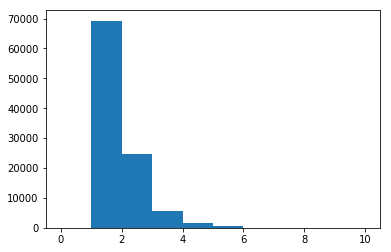

In [17]:
plt.hist(fusions.sum(), bins=10, range=(0,10))

In [19]:
SAMPLE_SIZE=0.5

In [21]:
entries = fusions[fusions.index != "truth"]
truth = fusions[fusions.index == "truth"]

In [22]:
curSet = random.sample(range(entries.shape[0]), int(entries.shape[0]*SAMPLE_SIZE))

In [23]:
curEntries=entries.iloc[curSet,:]
scl = summa.summa(curEntries.values, sample_names=curEntries.columns, bc_names=curEntries.index, tensor=False)
weights = dict(zip(curEntries.index, scl.get_weights()))


In [24]:
scl.get_scores(curEntries.values)

array([ 14451.14849721,  34435.17797835,  11801.68174605, ...,
        -9726.72300194, -48791.64144945,  -5388.22292046])

In [29]:
curEntries.values[:,0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
curEntries.values[:,1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
scl.get_scores(curEntries.values)

array([  8071.53009297,  21169.57239352, -18236.34924164, ...,
       -24994.93284151, -24797.50770564, -55900.01389675])

In [48]:
scl.get_scores(np.array([curEntries.values[:,1]]).transpose())

array([-33754.38616539])

In [46]:
np.array([curEntries.values[:,0]]).transpose().shape

(18, 1)

In [52]:
def compute_scores(data, weights):
    s = 0
    for j in range(len(weights)):
          s+= weights[j] * data[j, :]
    return s
 
scores = compute_scores(curEntries.values, scl.get_weights())

In [59]:
sum(scores > 0.3)

9

In [62]:
dict(zip(curEntries.columns, scores))


{'1_100015418_+_1_100049907_+': 0.07790880040626415,
 '1_100017813_+_1_100049907_+': 0.07790880040626415,
 '1_10002825_-_2_238252159_-': 0.0,
 '1_10003572_+_1_10009695_+': 0.0,
 '1_1001209_+_12_118693763_-': 0.0678913876165779,
 '1_1001328_+_10_135182426_-': -0.7794941087661775,
 '1_1001328_+_6_33589467_+': -0.7794941087661775,
 '1_100144142_+_12_122499850_-': 0.07790880040626415,
 '1_100147901_+_1_100148448_-': 0.07790880040626415,
 '1_100195303_-_3_183705557_-': -1.3174411705913274,
 '1_100195303_-_9_91934711_+': -0.5379470618251498,
 '1_100206348_-_5_140963181_-': 0.0,
 '1_100231348_-_10_75137202_-': 0.0678913876165779,
 '1_100315639_+_7_38763543_-': 0.0,
 '1_10032245_+_1_9982415_-': -0.5379470618251498,
 '1_10032245_+_1_9996684_-': -1.3174411705913274,
 '1_10032247_+_1_9982417_-': -0.025929106961254174,
 '1_10032247_+_1_9996686_-': -0.025929106961254174,
 '1_1003247_+_15_44085226_+': 0.238140680871201,
 '1_100343383_+_1_245021018_-': -0.47005567420857197,
 '1_100376267_+_2_10072086

In [90]:
threshold = 0.3
inference = scores > threshold
posCount = sum(scores >= threshold)
negCount = sum(scores < threshold)

tp = ((entries == inference) & (inference == True)).sum(axis=1)
fp = ((entries != inference) & (inference == False)).sum(axis=1)
tn = ((entries == inference) & (inference == False)).sum(axis=1)
fn = ((entries != inference) & (inference == True)).sum(axis=1)

In [91]:
print(json.dumps({"posCount" : int(posCount), "negCount" : int(negCount), "tp" : tp.to_dict(), "fp" : fp.to_dict(), "tn" : tn.to_dict(), "fn" : fn.to_dict()}, indent=4))

{
    "posCount": 9,
    "negCount": 102174,
    "tp": {
        "7185743": 0,
        "7238196": 0,
        "7269246": 0,
        "7378934": 0,
        "7488045": 9,
        "7997358": 0,
        "8040408": 0,
        "8071387": 0,
        "8114525": 0,
        "8226744": 0,
        "8281648": 0,
        "8289963": 0,
        "8289993": 0,
        "8295762": 0,
        "8396553": 0,
        "8396803": 0,
        "8399080": 0,
        "8517255": 1,
        "8545061": 3,
        "8614991": 0,
        "8614998": 0,
        "8615001": 0,
        "8644608": 0,
        "8645203": 0,
        "8645601": 0,
        "8645625": 0,
        "9605581": 0,
        "9609147": 0,
        "9609148": 0,
        "9609498": 9,
        "9609499": 9,
        "9609502": 0,
        "9609508": 0,
        "9610021": 0,
        "9610272": 0,
        "9614358": 0
    },
    "fp": {
        "7185743": 348,
        "7238196": 1508,
        "7269246": 3421,
        "7378934": 2497,
        "7488045": 8657,
        "

In [92]:
sum(entries.loc["7488045"])

8666

In [94]:
np.unique(scores)

array([-1.43675381, -1.41443302, -1.4108247 , -1.39961977, -1.39601145,
       -1.38850391, -1.38155818, -1.37369066, -1.36886242, -1.36143187,
       -1.35562908, -1.34654163, -1.34337028, -1.34306102, -1.34293331,
       -1.33550276, -1.32812007, -1.32061252, -1.31744117, -1.31713191,
       -1.31385574, -1.31018619, -1.30579928, -1.30255094, -1.28805434,
       -1.27547889, -1.24954978, -1.22047221, -0.85055685, -0.8357436 ,
       -0.83249526, -0.81768202, -0.80542322, -0.8018149 , -0.79378132,
       -0.77949411, -0.76785222, -0.75369271, -0.74979063, -0.73753183,
       -0.71160272, -0.68580132, -0.68252514, -0.63493891, -0.63133059,
       -0.62012566, -0.6090098 , -0.60811962, -0.60206408, -0.59845576,
       -0.59419656, -0.59094821, -0.5832084 , -0.58231822, -0.57993222,
       -0.57613497, -0.56704752, -0.56514681, -0.56387617, -0.5634392 ,
       -0.56187064, -0.55223428, -0.54862596, -0.54111841, -0.53794706,
       -0.53436163, -0.52630517, -0.51204084, -0.50886948, -0.50

In [133]:
thresholds = np.unique(scores)
tp_matrix = []
fp_matrix = []
tn_matrix = []
fn_matrix = []

posCount_out = []
negCount_out = []

for threshold in thresholds:
    inference = scores > threshold
    posCount = int(sum(scores >= threshold))
    negCount = int(sum(scores < threshold))

    tp = ((entries == inference) & (inference == True)).sum(axis=1)
    fp = ((entries != inference) & (inference == False)).sum(axis=1)
    tn = ((entries == inference) & (inference == False)).sum(axis=1)
    fn = ((entries != inference) & (inference == True)).sum(axis=1)

    tp_matrix.append(tp)
    fp_matrix.append(fp)
    tn_matrix.append(tn)
    fn_matrix.append(fn)
    
    posCount_out.append(posCount)
    negCount_out.append(negCount)

tp_out = dict(list( (i, list(k)) for i, k in pandas.DataFrame(tp_matrix).transpose().iterrows()))
fp_out = dict(list( (i, list(k)) for i, k in pandas.DataFrame(fp_matrix).transpose().iterrows()))
tn_out = dict(list( (i, list(k)) for i, k in pandas.DataFrame(tn_matrix).transpose().iterrows()))
fn_out = dict(list( (i, list(k)) for i, k in pandas.DataFrame(fn_matrix).transpose().iterrows()))



In [136]:
print(json.dumps({
    "thresholds" : list(thresholds), 
    "posCount":posCount_out, 
    "negCount":negCount_out,
    "tp" : tp_out,
    "fp" : fp_out,
    "tn" : tn_out,
    "fn" : fn_out
}))


{"thresholds": [-1.4367538074865074, -1.4144330176863174, -1.4108247005252532, -1.399619771487397, -1.396011454326333, -1.3885039107250632, -1.3815581839758933, -1.3736906645261429, -1.3688624198699295, -1.3614318650640853, -1.355629077014639, -1.3465416300697395, -1.3433702775525815, -1.3430610198214994, -1.3429333129086753, -1.3355027581028311, -1.328120066709755, -1.3206125231084853, -1.3174411705913274, -1.3171319128602452, -1.3138557355651317, -1.3101861861110753, -1.305799276909565, -1.3025509355969815, -1.2880543355167016, -1.2754788899360037, -1.2495497829747495, -1.2204722056312058, -0.8505568488999133, -0.8357436027009929, -0.8324952613884096, -0.8176820151894891, -0.8054232157274317, -0.8018148985663677, -0.7937813220456692, -0.7794941087661775, -0.767852215084415, -0.7536927087177474, -0.7497906275729113, -0.7375318281108538, -0.7116027211495997, -0.6858013211011695, -0.6825251438060559, -0.6349389089201398, -0.6313305917590757, -0.6201256627212194, -0.6090098019588857, -0.